In [1]:
%load_ext autoreload
%autoreload 2

from models import Detr
from utils import load_config
import torch

config = load_config(r"configs\train.yaml")

model = Detr(
    train_mode = False,
    with_gcn = False,
    pretrained='facebook/detr-resnet-50',
    checkpoint = r"checkpoints\encoder-pretraining-1\loss=0.86.ckpt",
    config=config)

device = torch.device('cuda:0')
model.to(device)

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DetrForObjectDetection were not initialized from the model checkpoin

Detr(
  (model): DetrForObjectDetection(
    (model): DetrModel(
      (backbone): DetrConvModel(
        (conv_encoder): DetrConvEncoder(
          (model): FeatureListNet(
            (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
            (bn1): DetrFrozenBatchNorm2d()
            (act1): ReLU(inplace=True)
            (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
            (layer1): Sequential(
              (0): Bottleneck(
                (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (bn1): DetrFrozenBatchNorm2d()
                (act1): ReLU(inplace=True)
                (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                (bn2): DetrFrozenBatchNorm2d()
                (drop_block): Identity()
                (act2): ReLU(inplace=True)
                (aa): Identity()
                (conv3): Conv2d(64, 256

<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\tangy\AppData\Local\Temp\ipykernel_8012\667076921.py:5: SyntaxWarning: invalid escape sequence '\P'
  image = cv2.imread('misc\PMC5402779_004_00.png')


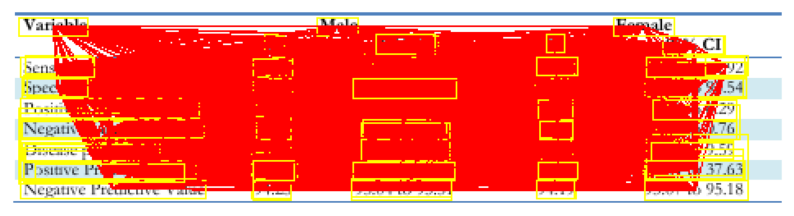

In [7]:
import cv2
from utils import draw_bboxes_and_edges
import matplotlib.pyplot as plt

image = cv2.imread('misc\PMC5402779_004_00.png')

with torch.no_grad():

    probs, bbox_pairs = model(image)

output_image = draw_bboxes_and_edges(image=image,prob_tensor=probs, edge_tensor=bbox_pairs, bbox_thickness=1, line_thickness=1)

# Convert BGR (OpenCV format) to RGB for displaying with matplotlib
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Display the image in the notebook
plt.figure(figsize=(10, 10))
plt.imshow(output_image_rgb)
plt.axis('off')  # Hide axes
plt.show()

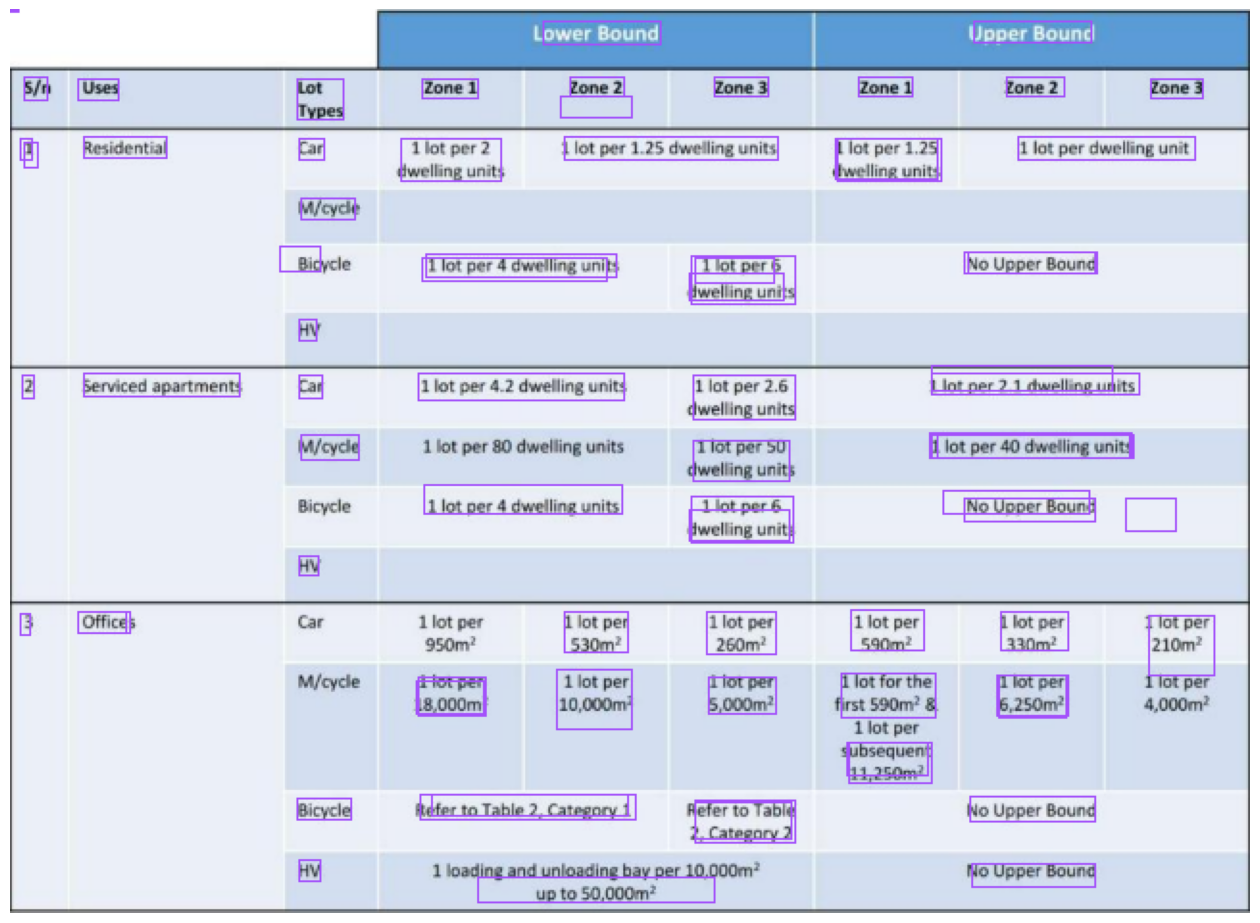

In [8]:
import cv2
import supervision as sv

with torch.no_grad():
    # load image and predict
    image = cv2.imread(r"misc\PDF02.PNG")
    outputs = model(image)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(device)
    results = model.image_processor.post_process_object_detection(
        outputs=outputs,
        threshold=0,
        target_sizes=target_sizes
    )[0]

# annotate
detections = sv.Detections.from_transformers(transformers_results=results)

box_annotator = sv.BoxAnnotator(thickness=1)
frame = box_annotator.annotate(scene=image, detections=detections)

%matplotlib inline
sv.plot_image(frame, (16, 16))